#### Steps in Data Science Project
1.Data Analysis
2.Feature Engineering
3.Feature Selection
4.Model Building
5.Model Deployment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Displays all the columns of the dataset

pd.pandas.set_option('display.max_columns',None)

In [3]:
dataset= pd.read_csv('train.csv')

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dataset.shape

(1460, 81)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### In Data Analysis the following steps needs to be follow
1.Missing Values
2.All The Numerical Variables
3.Distribution of the Numerical Variables
4.Categorical Variables
5.Cardinality of Categorical Variables
6.Outliers
7.Relationship between independent and dependent feature(SalePrice)

## 1. Missing Values

In [8]:
# Here we will check all % of missing value are there is each feature
#  First step is to make the list of feature having nan value
feature_with_nan=  [features for features in dataset.columns if dataset[features].isnull().sum()>1]

#  Second step is to print feature name and corresponding % of nan value
for features in feature_with_nan:
    print(features,np.round(dataset[features].isnull().mean(),4) ,'% of missing values')

LotFrontage 0.1774 % of missing values
Alley 0.9377 % of missing values
MasVnrType 0.0055 % of missing values
MasVnrArea 0.0055 % of missing values
BsmtQual 0.0253 % of missing values
BsmtCond 0.0253 % of missing values
BsmtExposure 0.026 % of missing values
BsmtFinType1 0.0253 % of missing values
BsmtFinType2 0.026 % of missing values
FireplaceQu 0.4726 % of missing values
GarageType 0.0555 % of missing values
GarageYrBlt 0.0555 % of missing values
GarageFinish 0.0555 % of missing values
GarageQual 0.0555 % of missing values
GarageCond 0.0555 % of missing values
PoolQC 0.9952 % of missing values
Fence 0.8075 % of missing values
MiscFeature 0.963 % of missing values


In [9]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Since there are lots of missing values we need to find the relationship with sales price

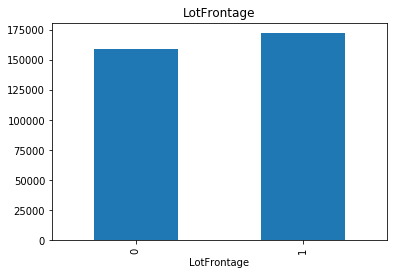

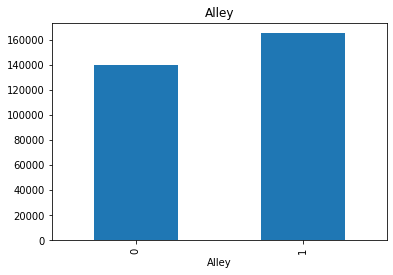

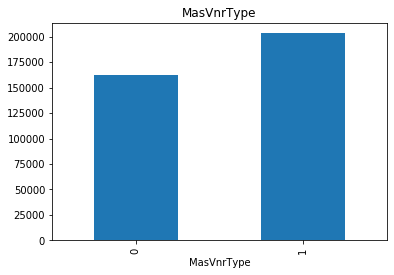

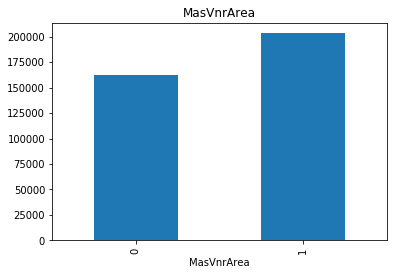

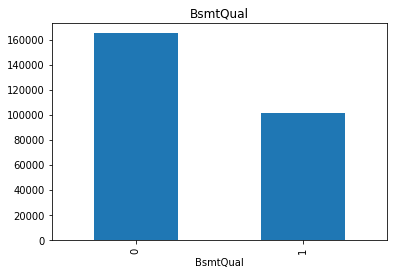

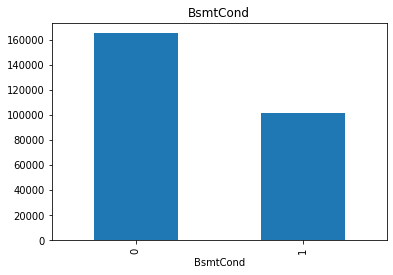

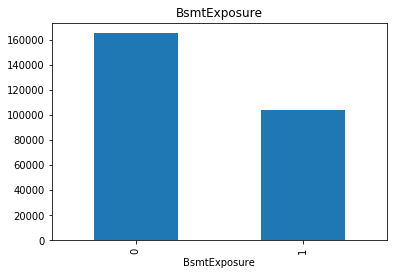

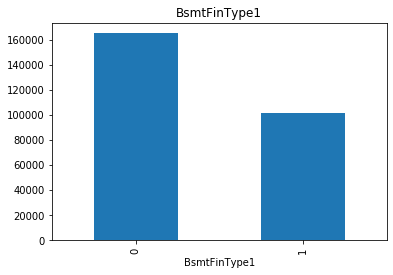

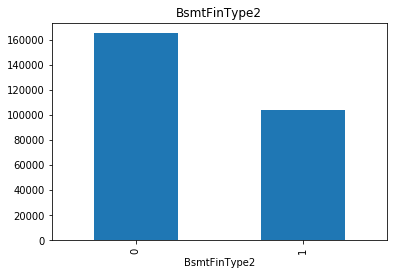

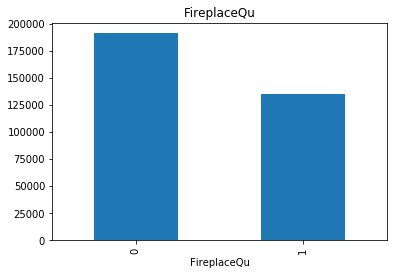

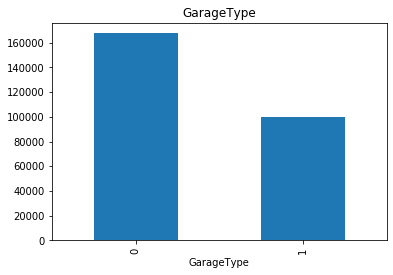

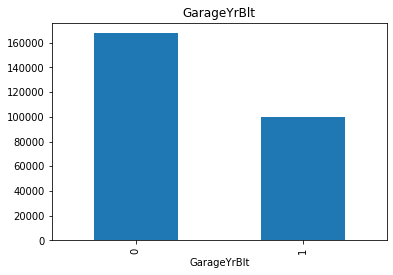

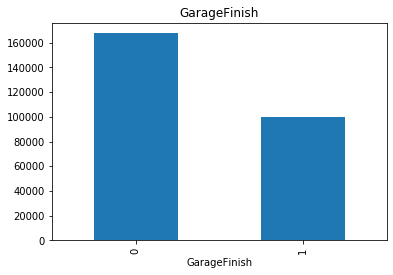

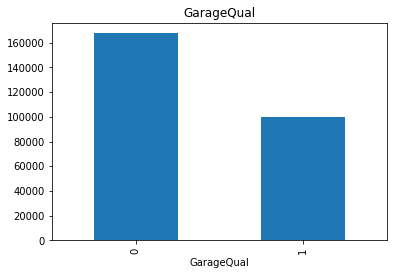

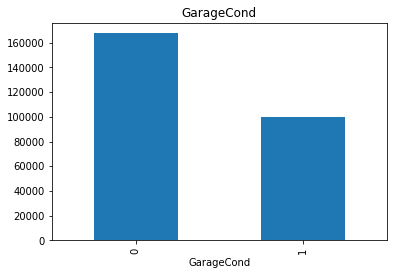

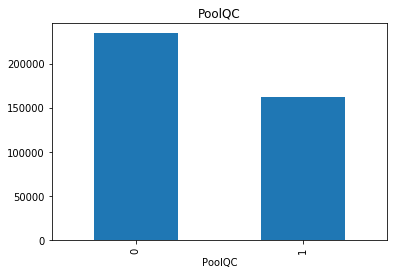

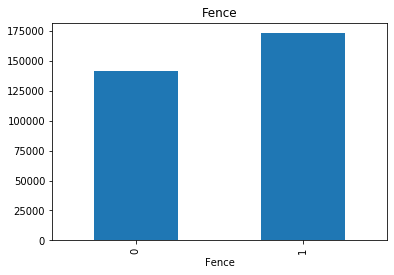

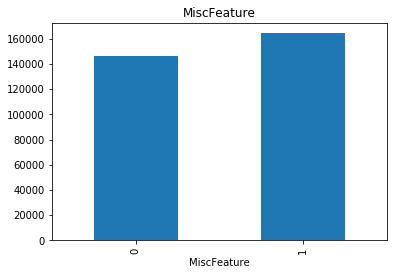

In [10]:
for feature in feature_with_nan:
    data=dataset.copy()
    
    #making the changes in the feature with nan value in such a way that the feature with missing observation assigned the value 
    # 1 otherwise 0
    data[feature]=np.where(data[feature].isnull(),1,0)
    
    # ploting the median of sales price with missing value and non-missing value 
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()
    

In [11]:
#The relationship between feature with missing value and sales price is clearly visibal.
#we need to replace these missing values with something meaningfull in feature engineering section 

## EDA on Numerical Variables

In [12]:
# Creating  a list having numerical variables 
numerical_var=[feature for feature in dataset.columns if dataset[feature].dtype !='O']

In [13]:
print('Number of Numerical Feature',len(numerical_var))

Number of Numerical Feature 38


In [14]:
#Visualising these numerical feature
dataset[numerical_var].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [15]:
# creating a variable of list type which will contain the year info

year_fea=[feature for feature in numerical_var if 'Yr' in feature or 'Year' in feature]

In [16]:
year_fea

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [17]:
# lets explore this year featured variable

# Here we can get some insights from this expression like year Built, year sold...
for feature in year_fea:
    print(feature,dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

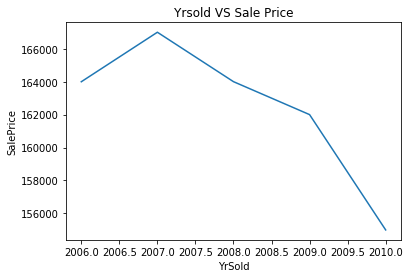

In [18]:
# Lets check the relationship between temporal datetime variable and sales price
# Here we will group by using Year sold of house and its Sales price and get some insight from it

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.title('Yrsold VS Sale Price')
plt.show()

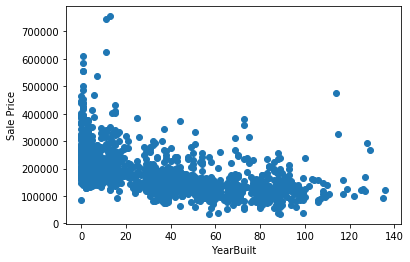

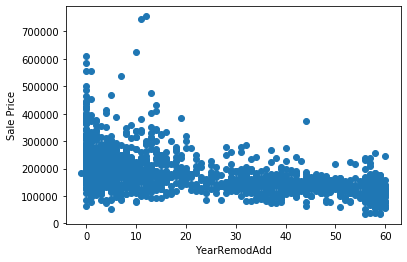

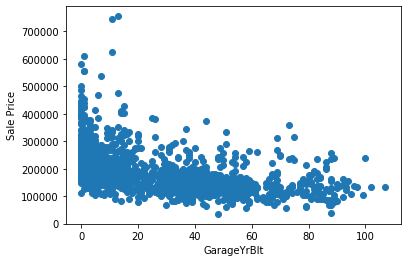

In [19]:
#Here we will compare all the year feature(except YrSold) and sale price

for feature in year_fea:
    
    data=dataset.copy()
    if feature != 'YrSold':
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()
        

In [20]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

descrete_var=[feature for feature in numerical_var if len(dataset[feature].unique())<25 and feature not in year_fea+ ['Id']]

In [21]:
print('Size of descrete Feature:{}'.format(len(descrete_var)))

Size of descrete Feature:17


In [22]:
descrete_var

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [23]:
dataset[descrete_var].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


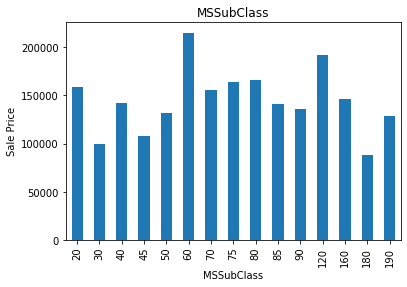

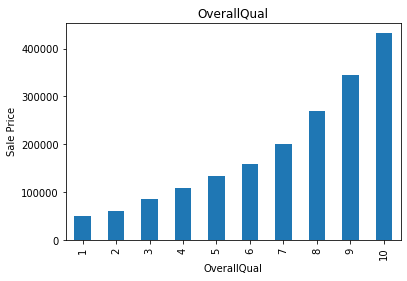

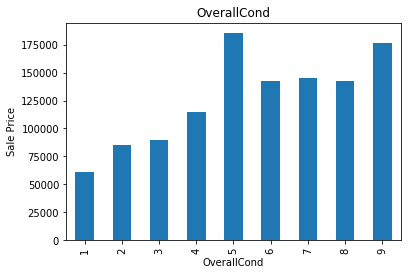

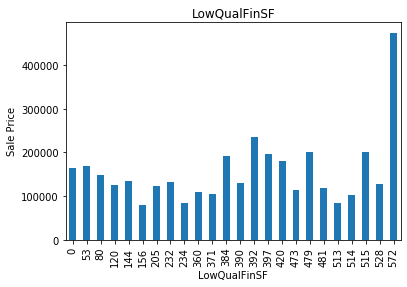

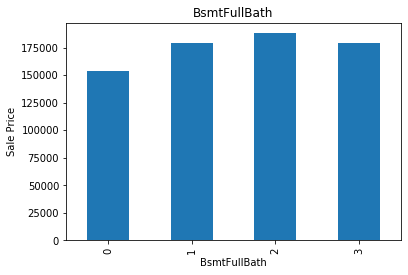

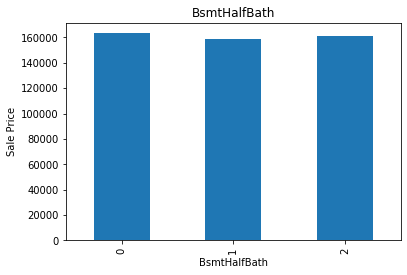

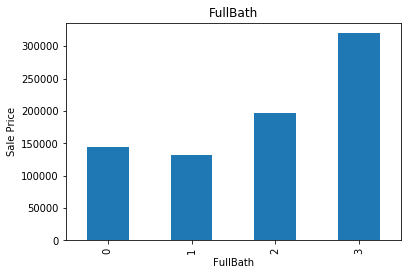

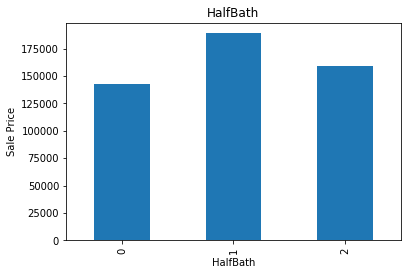

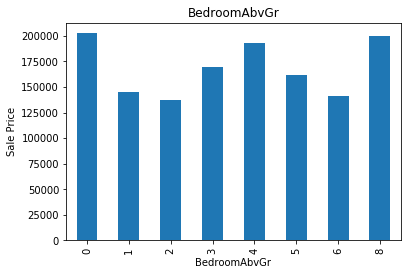

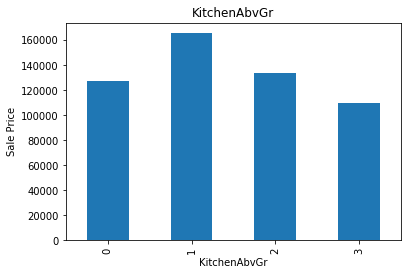

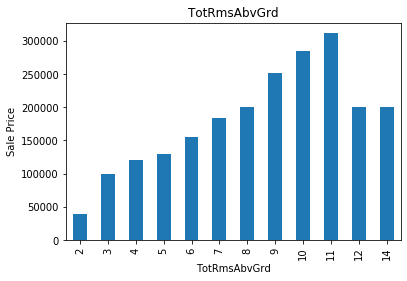

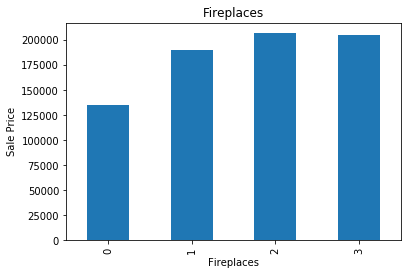

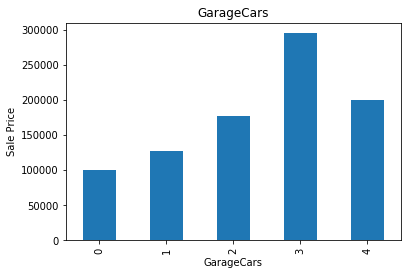

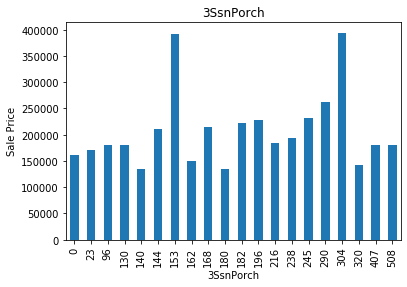

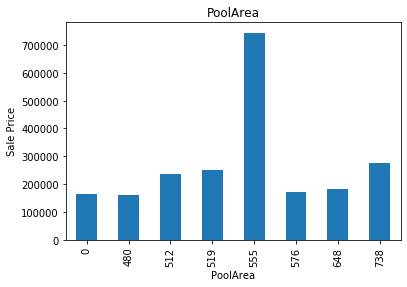

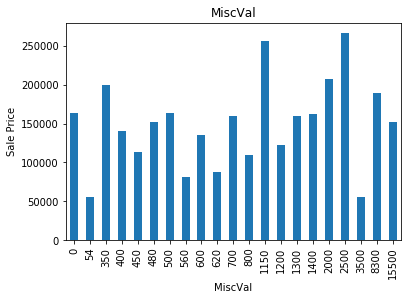

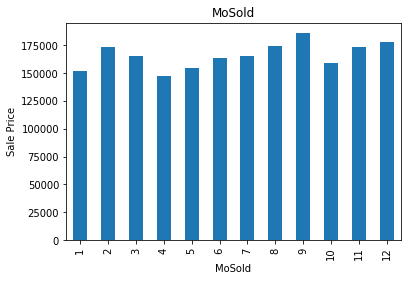

In [24]:

# Lets find the relationship between those descrete variables and sales price

for feature in descrete_var:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature)
    plt.show()

## Continuous Feature

In [25]:
# making the list of continuous feature
continuous_feature=[feature for feature in numerical_var if feature not in descrete_var + year_fea+['Id']]

In [26]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [27]:
print("Length of continuous Feature {}".format(len(continuous_feature)))

Length of continuous Feature 16


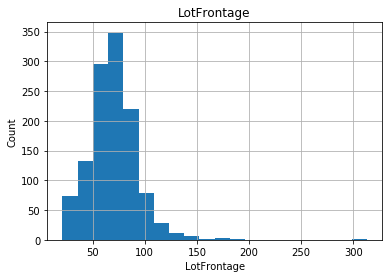

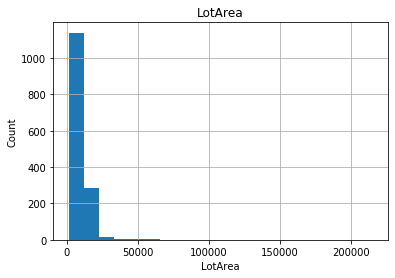

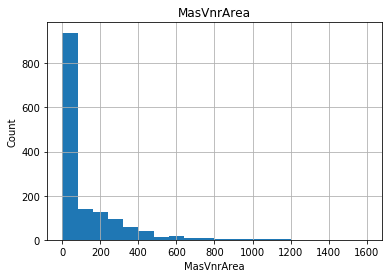

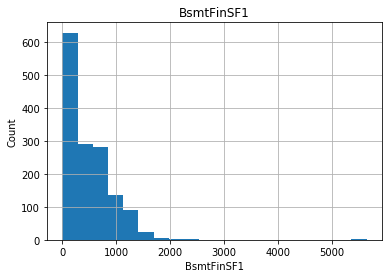

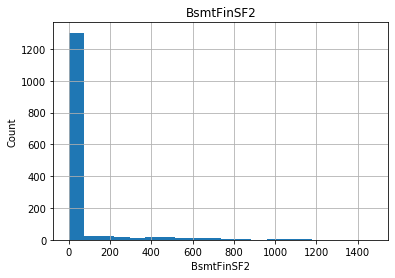

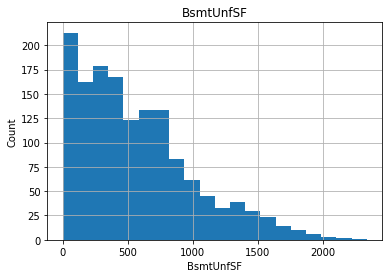

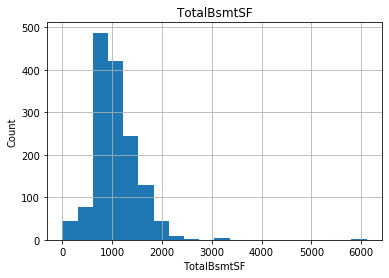

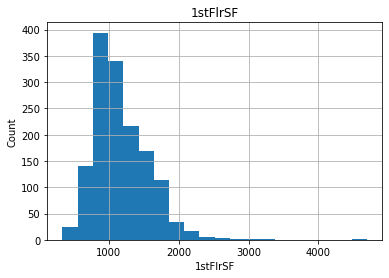

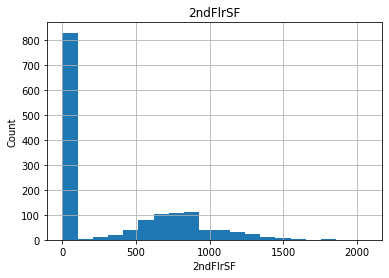

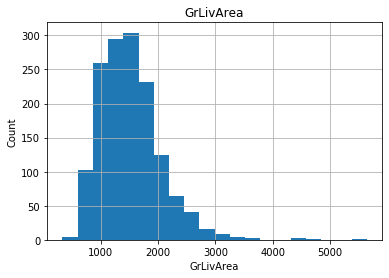

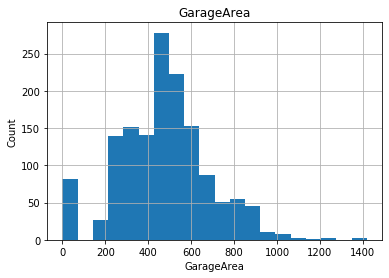

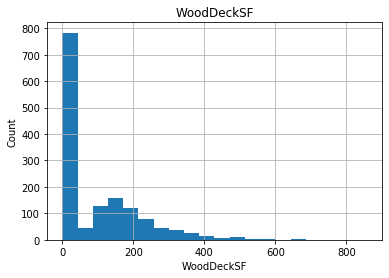

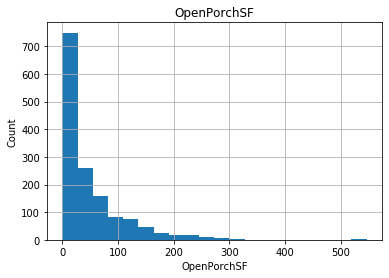

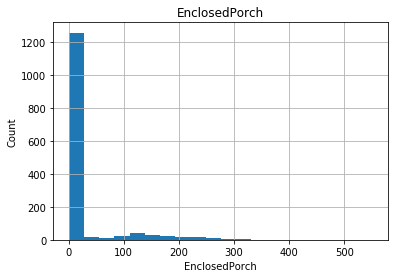

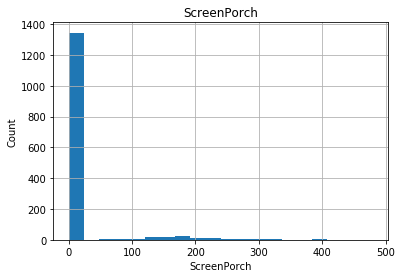

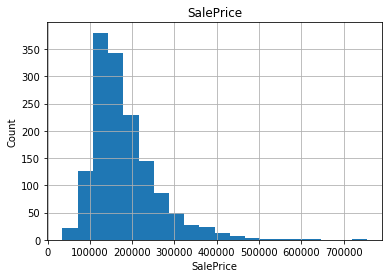

In [28]:
# Lets analyse the continuous feature and draw the histogram

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

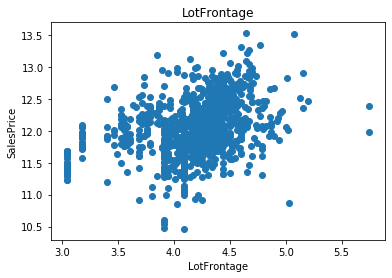

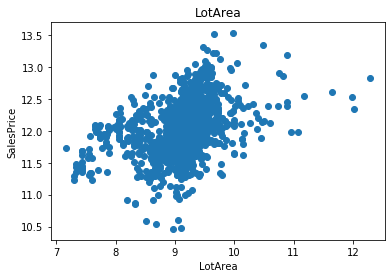

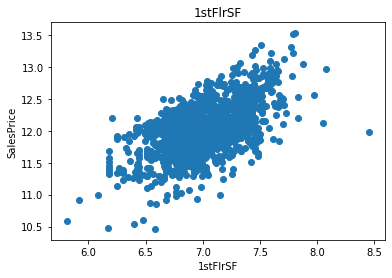

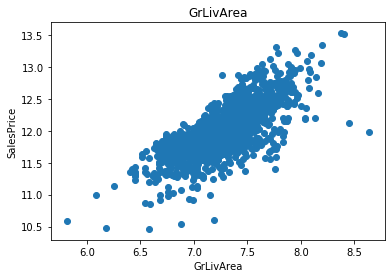

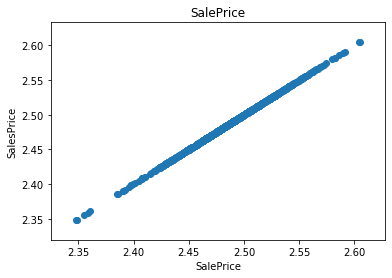

In [29]:
# From the above figure it can be concluded that data  is not Guagially distributed
# Now to convert it into gaugian distribution we will use logarithamic transformation

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()


## Finding The Outliers

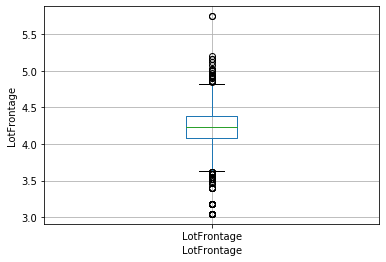

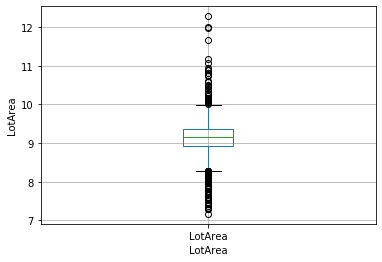

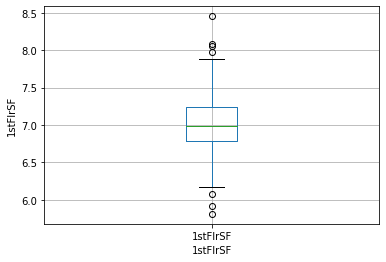

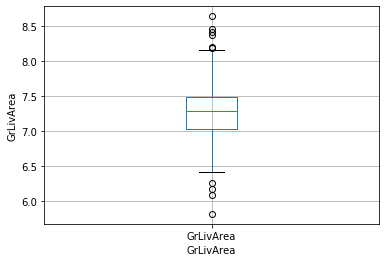

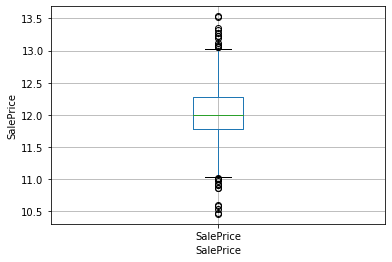

In [30]:
# Using Box Plot for finding outliers

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]= np.log(data[feature])
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.show()

## Categorical Feature

In [31]:
categorical_feature=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [32]:
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [33]:
print("Length of categorical data {}".format(len(categorical_feature)))

Length of categorical data 43


In [34]:
dataset[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [35]:
# There are many categoracal feature in the dataset 
# lets find the numbers of categories in each categorical_feature
for feature in categorical_feature:
    print("The Feature is {} and the number of categories are {}".format(feature,len(dataset[feature].unique())))

The Feature is MSZoning and the number of categories are 5
The Feature is Street and the number of categories are 2
The Feature is Alley and the number of categories are 3
The Feature is LotShape and the number of categories are 4
The Feature is LandContour and the number of categories are 4
The Feature is Utilities and the number of categories are 2
The Feature is LotConfig and the number of categories are 5
The Feature is LandSlope and the number of categories are 3
The Feature is Neighborhood and the number of categories are 25
The Feature is Condition1 and the number of categories are 9
The Feature is Condition2 and the number of categories are 8
The Feature is BldgType and the number of categories are 5
The Feature is HouseStyle and the number of categories are 8
The Feature is RoofStyle and the number of categories are 6
The Feature is RoofMatl and the number of categories are 8
The Feature is Exterior1st and the number of categories are 15
The Feature is Exterior2nd and the numb

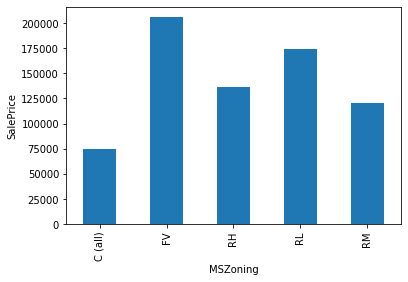

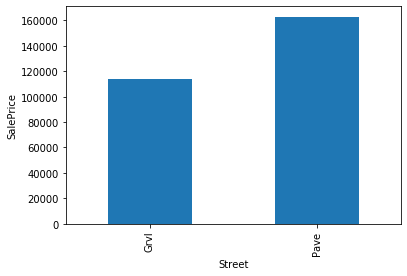

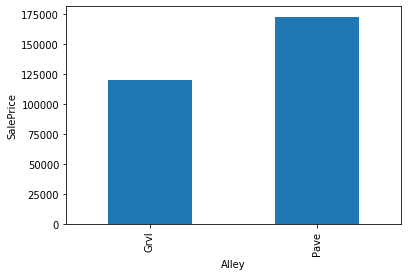

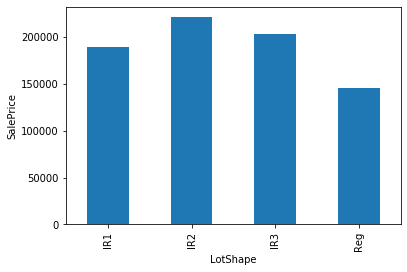

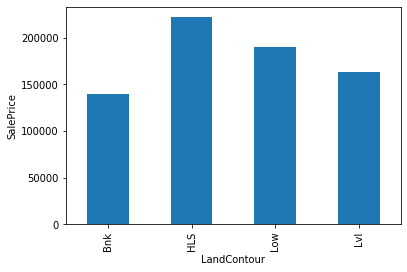

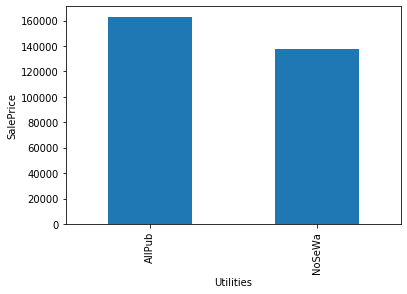

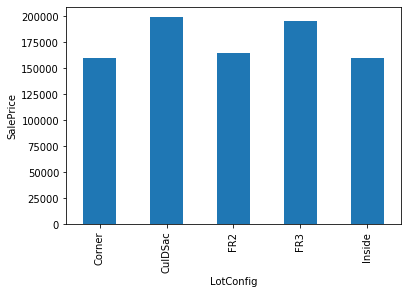

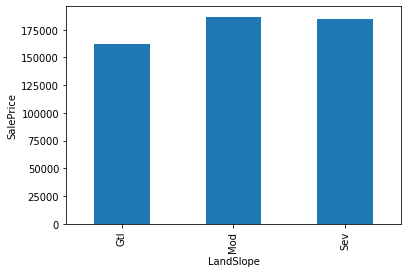

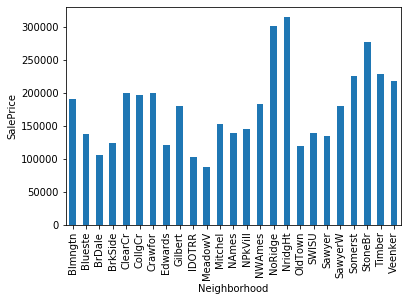

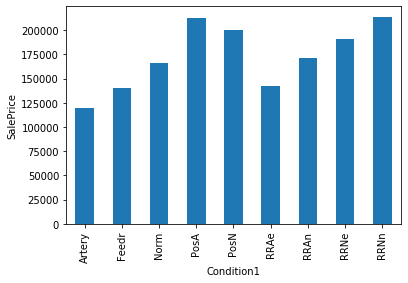

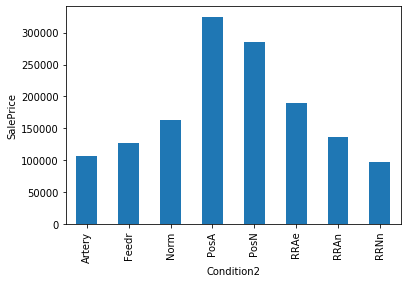

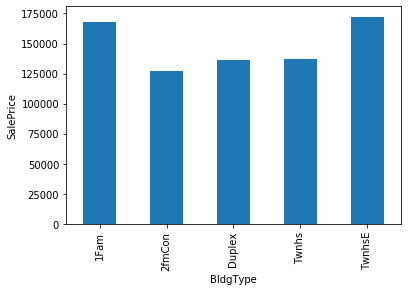

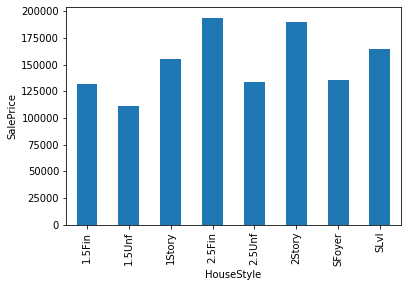

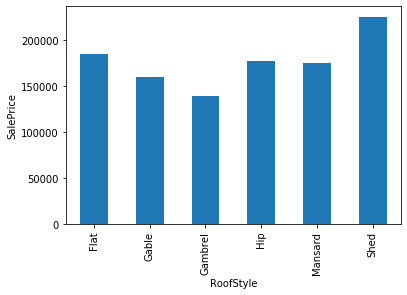

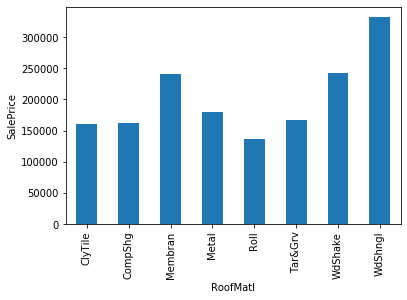

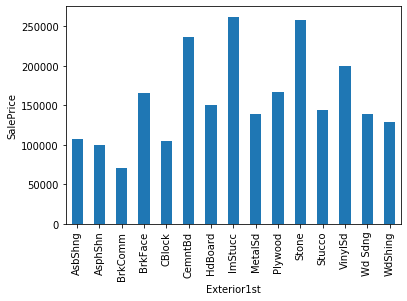

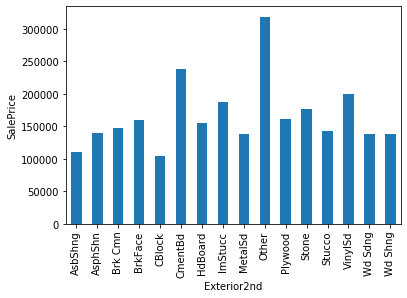

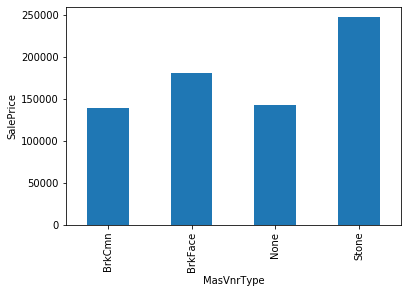

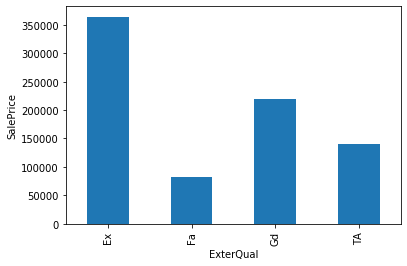

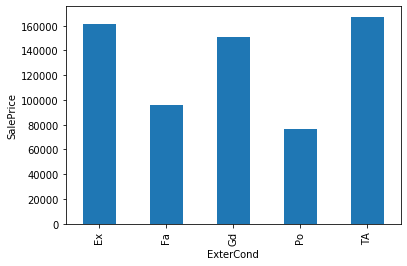

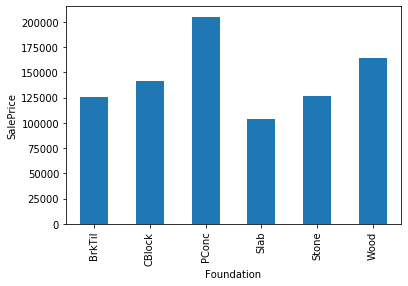

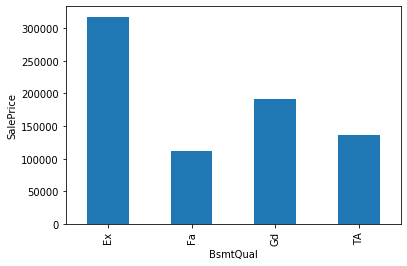

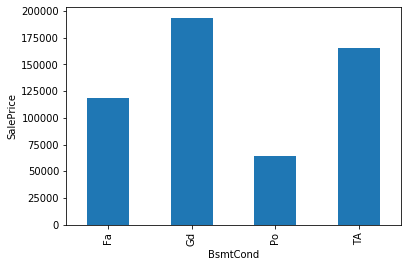

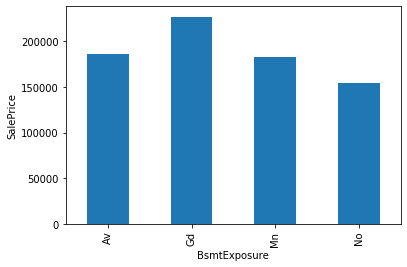

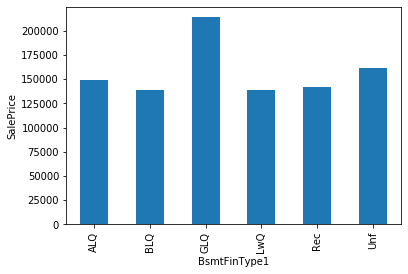

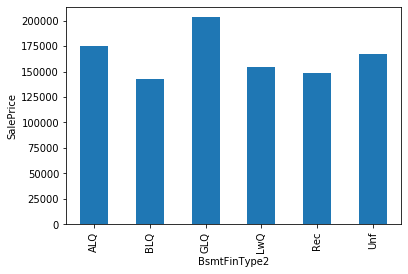

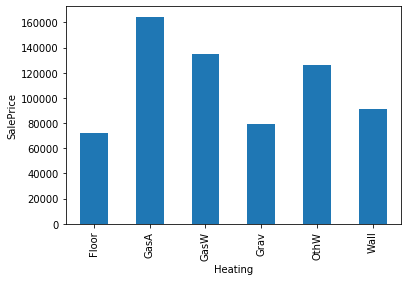

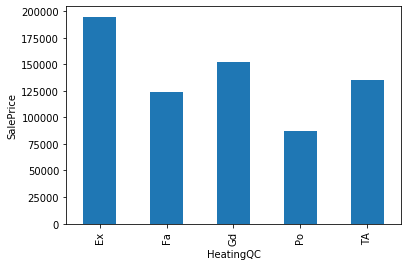

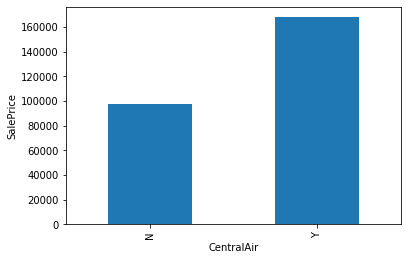

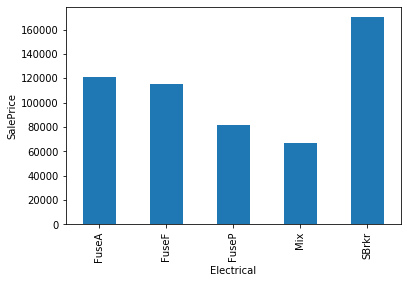

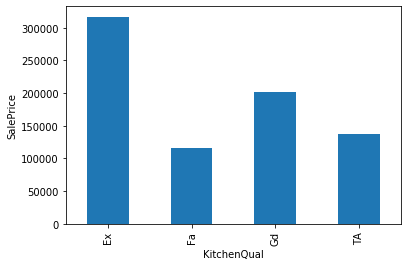

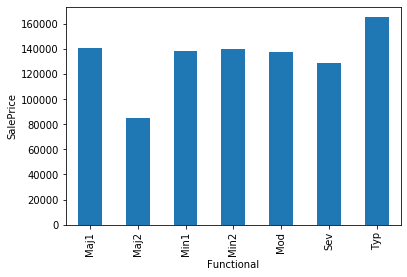

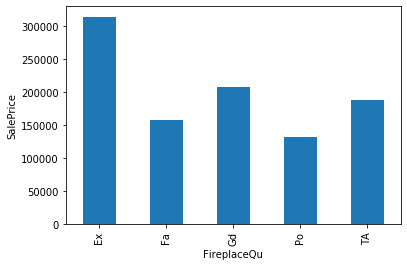

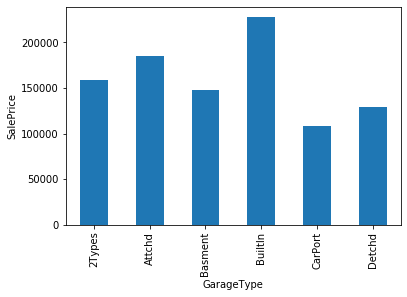

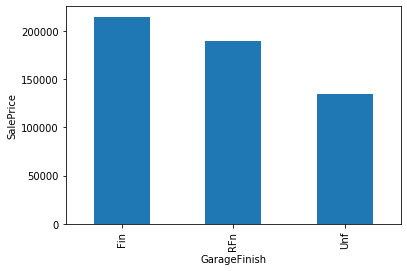

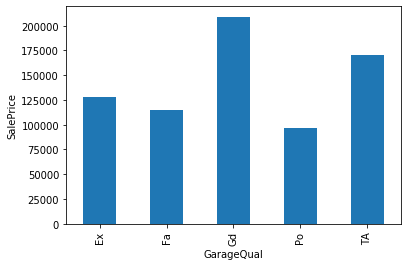

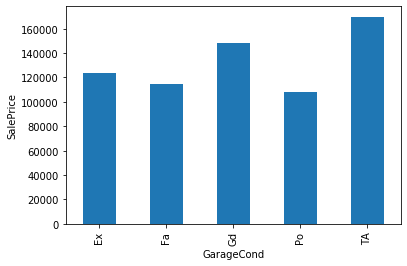

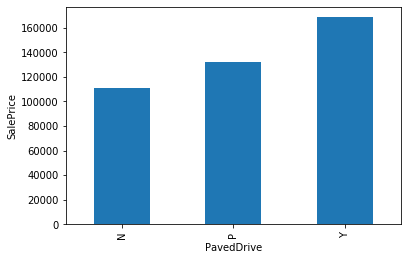

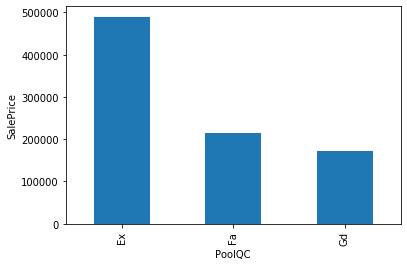

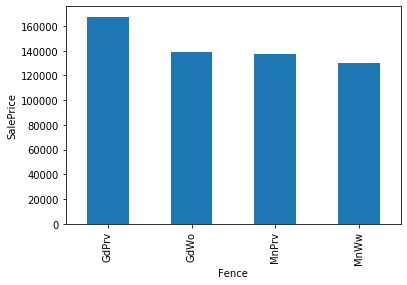

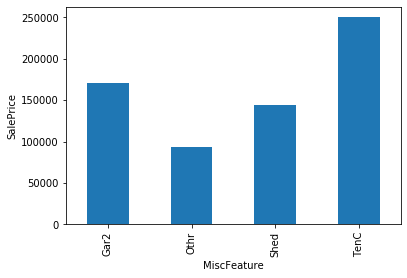

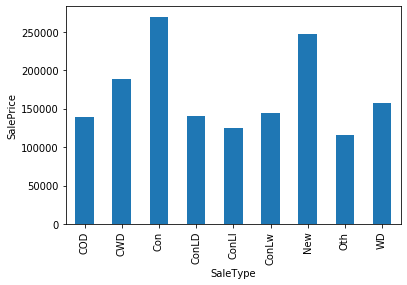

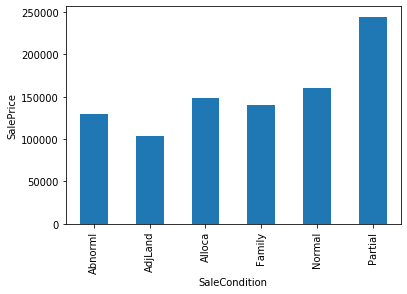

In [36]:
# Now finding out the realtionship between categorical feature and the dependent variable sales price

for feature in categorical_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

## Feature Engineering
Steps in feature engineering
1.Missing values
2.Temporal Variables(Year)
3.Categorical variables: Remove Rare variables
4.standarize the value of variable to same range

In [37]:
# There is always the chance of data leakage so we will have to do train test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dataset,dataset['SalePrice'],test_size=0.1,random_state=0)

In [38]:
X_train.shape

(1314, 81)

In [39]:
X_test.shape

(146, 81)

In [40]:
Y_train.shape , Y_test.shape

((1314,), (146,))

## Missing Values In Categorical Feature

In [41]:
# Lets make a list of categorical features with nan values

categorical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtype=='O']

In [42]:
print("Length of categorical feature with nan values:{}".format(len(categorical_with_nan)))

Length of categorical feature with nan values:15


In [43]:
# Now lets find out % of nan values in each categorical feature
for feature in categorical_with_nan:
    print("The feature {} has {} % of categorical Feature".format(feature,np.round(dataset[feature].isnull().mean(),4)))

The feature Alley has 0.9377 % of categorical Feature
The feature MasVnrType has 0.0055 % of categorical Feature
The feature BsmtQual has 0.0253 % of categorical Feature
The feature BsmtCond has 0.0253 % of categorical Feature
The feature BsmtExposure has 0.026 % of categorical Feature
The feature BsmtFinType1 has 0.0253 % of categorical Feature
The feature BsmtFinType2 has 0.026 % of categorical Feature
The feature FireplaceQu has 0.4726 % of categorical Feature
The feature GarageType has 0.0555 % of categorical Feature
The feature GarageFinish has 0.0555 % of categorical Feature
The feature GarageQual has 0.0555 % of categorical Feature
The feature GarageCond has 0.0555 % of categorical Feature
The feature PoolQC has 0.9952 % of categorical Feature
The feature Fence has 0.8075 % of categorical Feature
The feature MiscFeature has 0.963 % of categorical Feature


In [44]:
# Replacing the missing values with new label

def replace_nan_cat(dataset,categorical_with_nan):
    data=dataset.copy()
    data[categorical_with_nan]=data[categorical_with_nan].fillna("missing")
    return data
    
dataset=replace_nan_cat(dataset,categorical_with_nan)

dataset[categorical_with_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [45]:
dataset[categorical_with_nan].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,missing,BrkFace,Gd,TA,No,GLQ,Unf,missing,Attchd,RFn,TA,TA,missing,missing,missing
1,missing,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,missing,missing,missing
2,missing,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,missing,missing,missing
3,missing,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,missing,missing,missing
4,missing,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,missing,missing,missing


In [46]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000


In [47]:
# Now lets explore the numerical_variables with nan values

numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtype!='O']

for feature in numerical_with_nan:
    print("{} has {} % of missing value".format(feature,np.round(dataset[feature].isnull().mean(),4)))

LotFrontage has 0.1774 % of missing value
MasVnrArea has 0.0055 % of missing value
GarageYrBlt has 0.0555 % of missing value


In [48]:
# Now replacing the numerical missing values 
# since there is outliers in continuous features will replace the missing valuse with median

for feature in numerical_with_nan:
   # data=dataset.copy()
    median_value=dataset[feature].median()
    
    # creating a new feature to capture nan values
    #dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [49]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000


In [50]:
dataset.shape

(1460, 81)

In [51]:
year_fea

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [52]:
# Handeling the temporal Variable
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    dataset[feature]=dataset['YrSold']-dataset[feature]

    

In [53]:
dataset[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


## Handling Numerical Feature

In [54]:
# Since the numerical_features are skewed in nature so we need to perform log normal distribution to convert it into gaussian distribution

numerical_feature=['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

for feature in numerical_feature:
    dataset[feature]=np.log(dataset[feature])

C:\Users\Neeraj\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [55]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.278115,Gd,TA,PConc,Gd,TA,No,GLQ,6.559615,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,6.749931,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2,6.306275,TA,TA,Y,-inf,4.110874,-inf,0,-inf,0,missing,missing,missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,-inf,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.885510,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,-inf,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,6.131226,TA,TA,Y,5.697093,-inf,-inf,0,-inf,0,missing,missing,missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.087596,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.186209,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,6.763885,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,6.410175,TA,TA,Y,-inf,3.737670,-inf,0,-inf,0,missing,missing,missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,-inf,TA,TA,BrkTil,TA,Gd,No,ALQ,5.375278,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,6.628041,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,6.464588,TA,TA,Y,-inf,3.555348,5.605802,0,-inf,0,missing,missing,missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.857933,Gd,TA,PConc,Gd,TA,Av,GLQ,6.484635,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,6.959399,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,6.728629,TA,TA,Y,5.257495,4.430817,-inf,0,-inf,0,missing,missing,missing,0,12,2008,WD,Normal,12.429216


## Handling rare categorical Feature

In [56]:
#removing categorical variables that are present less than 1% of the observations

categorical_feature=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
categorical_feature


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [57]:
print("Length of categorical feature is",len(categorical_feature))

Length of categorical feature is 43


In [58]:
len(dataset)

1460

In [59]:
#To understand the code in better way

data=dataset.groupby('MSZoning')['SalePrice'].count()
data

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: SalePrice, dtype: int64

In [60]:
data=dataset.groupby('MSZoning')['SalePrice'].count()/1460
data

MSZoning
C (all)    0.006849
FV         0.044521
RH         0.010959
RL         0.788356
RM         0.149315
Name: SalePrice, dtype: float64

In [61]:
for feature in categorical_feature:
    percent=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    
    final_percent=percent[percent>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(final_percent),dataset[feature],'Rare Value')
    

In [62]:
dataset.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.278115,Gd,TA,PConc,Gd,TA,No,GLQ,6.559615,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,6.749931,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2,6.306275,TA,TA,Y,-inf,4.110874,-inf,0,-inf,0,missing,missing,missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Rare Value,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,-inf,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.885510,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,-inf,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,6.131226,TA,TA,Y,5.697093,-inf,-inf,0,-inf,0,missing,missing,missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.087596,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.186209,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,6.763885,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,6.410175,TA,TA,Y,-inf,3.737670,-inf,0,-inf,0,missing,missing,missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,-inf,TA,TA,BrkTil,TA,Gd,No,ALQ,5.375278,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,6.628041,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,6.464588,TA,TA,Y,-inf,3.555348,5.605802,0,-inf,0,missing,missing,missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.857933,Gd,TA,PConc,Gd,TA,Av,GLQ,6.484635,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,6.959399,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,6.728629,TA,TA,Y,5.257495,4.430817,-inf,0,-inf,0,missing,missing,missing,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,4.234107,9.186560,Pave,missing,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,4.219508,Ex,Gd,PConc,Gd,Gd,No,ALQ,5.736572,Unf,0,370,680,GasA,Gd,Y,SBrkr,680,6.672033,0,7.293018,0,0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,16.0,Fin,2,6.040255,TA,TA,Y,5.446737,4.143135,-inf,0,-inf,0,missing,missing,Shed,480,4,2009,WD,Normal,12.128111
96,97,20,RL,4.356709,9.236398,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,7,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.209486,Gd,TA,PConc,Gd,TA,Av,ALQ,7.057898,Unf,0,426,1588,GasA,Ex,Y,SBrkr,1588,-inf,0,7.370231,0,0,2,0,3,1,Gd,6,Typ,0,missing,Attchd,7.0,RFn,2,6.156979,TA,TA,Y,5.062595,3.367296,-inf,0,-inf,0,missing,missing,missing,0,8,2006,WD,Normal,12.273731
97,98,20,RL,4.290459,9.298443,Pave,missing,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,42,42,Hip,CompShg,HdBo

## Making Label Encoding To Categorical Feature

In [63]:
# Sorts the mean() sale price of each categorical values of every  categorical feature based on its values
for feature in categorical_feature:
    ordered_feature=dataset.groupby(feature)['SalePrice'].mean().sort_values()
    print(ordered_feature)    

MSZoning
Rare Value    11.118259
RM            11.692893
RH            11.749840
RL            12.085885
FV            12.246616
Name: SalePrice, dtype: float64
Street
Rare Value    11.667435
Pave          12.025522
Name: SalePrice, dtype: float64
Alley
Grvl       11.673354
Pave       11.996812
missing    12.037675
Name: SalePrice, dtype: float64
LotShape
Reg           11.936094
IR1           12.163465
Rare Value    12.205413
IR2           12.318450
Name: SalePrice, dtype: float64
LandContour
Bnk    11.810740
Lvl    12.022694
Low    12.120086
HLS    12.259257
Name: SalePrice, dtype: float64
Utilities
Rare Value    11.831379
AllPub        12.024183
Name: SalePrice, dtype: float64
LotConfig
Inside        12.001900
Corner        12.027446
FR2           12.034741
Rare Value    12.195684
CulDSac       12.249810
Name: SalePrice, dtype: float64
LandSlope
Gtl           12.020565
Mod           12.076866
Rare Value    12.130561
Name: SalePrice, dtype: float64
Neighborhood
IDOTRR        11.446889

In [64]:
# Sorts the mean() sale price of each categorical values of every  categorical feature based on its index
for feature in categorical_feature:
    ordered_feature=dataset.groupby(feature)['SalePrice'].mean().sort_values().index
    print(ordered_feature)

Index(['Rare Value', 'RM', 'RH', 'RL', 'FV'], dtype='object', name='MSZoning')
Index(['Rare Value', 'Pave'], dtype='object', name='Street')
Index(['Grvl', 'Pave', 'missing'], dtype='object', name='Alley')
Index(['Reg', 'IR1', 'Rare Value', 'IR2'], dtype='object', name='LotShape')
Index(['Bnk', 'Lvl', 'Low', 'HLS'], dtype='object', name='LandContour')
Index(['Rare Value', 'AllPub'], dtype='object', name='Utilities')
Index(['Inside', 'Corner', 'FR2', 'Rare Value', 'CulDSac'], dtype='object', name='LotConfig')
Index(['Gtl', 'Mod', 'Rare Value'], dtype='object', name='LandSlope')
Index(['IDOTRR', 'MeadowV', 'BrDale', 'BrkSide', 'OldTown', 'Edwards',
       'Sawyer', 'SWISU', 'NAmes', 'Mitchel', 'SawyerW', 'Rare Value',
       'NWAmes', 'Gilbert', 'CollgCr', 'Blmngtn', 'Crawfor', 'ClearCr',
       'Somerst', 'Timber', 'StoneBr', 'NridgHt', 'NoRidge'],
      dtype='object', name='Neighborhood')
Index(['Artery', 'Feedr', 'Norm', 'Rare Value', 'RRAn', 'PosN'], dtype='object', name='Condition1'

In [65]:
# Making the label o each and every categorical_feature values of each categorical_feature using enumerate() function
# Remember that enumerate returns a enumerate object
for feature in categorical_feature:
    ordered_feature=dataset.groupby(feature)['SalePrice'].mean().sort_values().index
    labeled_feature= {i:value for i,value in enumerate(ordered_feature,0)}
    print(labeled_feature)

{0: 'Rare Value', 1: 'RM', 2: 'RH', 3: 'RL', 4: 'FV'}
{0: 'Rare Value', 1: 'Pave'}
{0: 'Grvl', 1: 'Pave', 2: 'missing'}
{0: 'Reg', 1: 'IR1', 2: 'Rare Value', 3: 'IR2'}
{0: 'Bnk', 1: 'Lvl', 2: 'Low', 3: 'HLS'}
{0: 'Rare Value', 1: 'AllPub'}
{0: 'Inside', 1: 'Corner', 2: 'FR2', 3: 'Rare Value', 4: 'CulDSac'}
{0: 'Gtl', 1: 'Mod', 2: 'Rare Value'}
{0: 'IDOTRR', 1: 'MeadowV', 2: 'BrDale', 3: 'BrkSide', 4: 'OldTown', 5: 'Edwards', 6: 'Sawyer', 7: 'SWISU', 8: 'NAmes', 9: 'Mitchel', 10: 'SawyerW', 11: 'Rare Value', 12: 'NWAmes', 13: 'Gilbert', 14: 'CollgCr', 15: 'Blmngtn', 16: 'Crawfor', 17: 'ClearCr', 18: 'Somerst', 19: 'Timber', 20: 'StoneBr', 21: 'NridgHt', 22: 'NoRidge'}
{0: 'Artery', 1: 'Feedr', 2: 'Norm', 3: 'Rare Value', 4: 'RRAn', 5: 'PosN'}
{0: 'Rare Value', 1: 'Norm'}
{0: '2fmCon', 1: 'Twnhs', 2: 'Duplex', 3: '1Fam', 4: 'TwnhsE'}
{0: 'SFoyer', 1: '1.5Fin', 2: 'Rare Value', 3: '1Story', 4: 'SLvl', 5: '2Story'}
{0: 'Gable', 1: 'Rare Value', 2: 'Hip'}
{0: 'CompShg', 1: 'Rare Value'}
{0:

In [66]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.278115,Gd,TA,PConc,Gd,TA,No,GLQ,6.559615,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,6.749931,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2,6.306275,TA,TA,Y,-inf,4.110874,-inf,0,-inf,0,missing,missing,missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Rare Value,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,-inf,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.885510,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,-inf,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,6.131226,TA,TA,Y,5.697093,-inf,-inf,0,-inf,0,missing,missing,missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.087596,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.186209,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,6.763885,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,6.410175,TA,TA,Y,-inf,3.737670,-inf,0,-inf,0,missing,missing,missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,-inf,TA,TA,BrkTil,TA,Gd,No,ALQ,5.375278,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,6.628041,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,6.464588,TA,TA,Y,-inf,3.555348,5.605802,0,-inf,0,missing,missing,missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.857933,Gd,TA,PConc,Gd,TA,Av,GLQ,6.484635,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,6.959399,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,6.728629,TA,TA,Y,5.257495,4.430817,-inf,0,-inf,0,missing,missing,missing,0,12,2008,WD,Normal,12.429216


In [67]:
# Now last step of label Encoding is mapping these enumerated values to each feature
for feature in categorical_feature:
    ordered_feature=dataset.groupby(feature)['SalePrice'].mean().sort_values().index
    labeled_feature= {value:i for i,value in enumerate(ordered_feature,0)}
    dataset[feature]=dataset[feature].map(labeled_feature)

In [68]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,5.278115,2,3,4,3,3,1,6,6.559615,5,0,150,856,2,4,1,3,856,6.749931,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,6.306275,2,3,2,-inf,4.110874,-inf,0,-inf,0,0,4,2,0,2,2008,2,3,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,-inf,1,3,2,3,3,4,4,6.885510,5,0,284,1262,2,4,1,3,1262,-inf,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,6.131226,2,3,2,5.697093,-inf,-inf,0,-inf,0,0,4,2,0,5,2007,2,3,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,5.087596,2,3,4,3,3,2,6,6.186209,5,0,434,920,2,4,1,3,920,6.763885,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,6.410175,2,3,2,-inf,3.737670,-inf,0,-inf,0,0,4,2,0,9,2008,2,3,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,-inf,1,3,1,2,4,1,4,5.375278,5,0,540,756,2,3,1,3,961,6.628041,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,6.464588,2,3,2,-inf,3.555348,5.605802,0,-inf,0,0,4,2,0,2,2006,2,0,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,5.857933,2,3,4,3,3,3,6,6.484635,5,0,490,1145,2,4,1,3,1145,6.959399,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,6.728629,2,3,2,5.257495,4.430817,-inf,0,-inf,0,0,4,2,0,12,2008,2,3,12.429216


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [70]:
dataset.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [71]:
dataset['WoodDeckSF'].isnull().sum()

0

In [72]:
dataset.shape

(1460, 81)

In [73]:
dataset['WoodDeckSF'].value_counts().unique()

array([761,  38,  36,  33,  31,  28,  15,  14,  10,   9,   8,   6,   5,
         4,   3,   2,   1], dtype=int64)

In [74]:
feature_to_drop=['WoodDeckSF','MasVnrArea','2ndFlrSF','OpenPorchSF','EnclosedPorch','ScreenPorch']
dataset.drop(columns=feature_to_drop,inplace=True,axis=1)

In [75]:
dataset.shape

(1460, 75)

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [77]:
column_to_drop=['BsmtFinSF1','GrLivArea','GarageYrBlt','GarageArea']
dataset.drop(columns=column_to_drop,axis=1,inplace=True)

In [78]:
dataset.shape

(1460, 71)

In [79]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,2,3,4,3,3,1,6,5,0,150,856,2,4,1,3,856,0,1,0,2,1,3,1,2,8,4,0,1,4,2,2,2,3,2,0,0,0,4,2,0,2,2008,2,3,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,1,3,2,3,3,4,4,5,0,284,1262,2,4,1,3,1262,0,0,1,2,0,3,1,1,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,5,2007,2,3,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,2,3,4,3,3,2,6,5,0,434,920,2,4,1,3,920,0,1,0,2,1,3,1,2,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,9,2008,2,3,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,1,3,1,2,4,1,4,5,0,540,756,2,3,1,3,961,0,1,0,1,0,3,1,2,7,4,1,4,2,1,3,2,3,2,0,0,0,4,2,0,2,2006,2,0,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,2,3,4,3,3,3,6,5,0,490,1145,2,4,1,3,1145,0,1,0,2,1,4,1,2,9,4,1,3,4,2,3,2,3,2,0,0,0,4,2,0,12,2008,2,3,12.429216


## Feature Scaling

In [80]:
feature_to_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]
feature_to_scale

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleConditi

In [81]:
len(feature_to_scale)

69

In [82]:
from sklearn.preprocessing import  MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_to_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [83]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,2,3,4,3,3,1,6,5,0,150,856,2,4,1,3,856,0,1,0,2,1,3,1,2,8,4,0,1,4,2,2,2,3,2,0,0,0,4,2,0,2,2008,2,3,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,1,3,2,3,3,4,4,5,0,284,1262,2,4,1,3,1262,0,0,1,2,0,3,1,1,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,5,2007,2,3,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,2,3,4,3,3,2,6,5,0,434,920,2,4,1,3,920,0,1,0,2,1,3,1,2,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,9,2008,2,3,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,1,3,1,2,4,1,4,5,0,540,756,2,3,1,3,961,0,1,0,1,0,3,1,2,7,4,1,4,2,1,3,2,3,2,0,0,0,4,2,0,2,2006,2,0,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,2,3,4,3,3,3,6,5,0,490,1145,2,4,1,3,1145,0,1,0,2,1,4,1,2,9,4,1,3,4,2,3,2,3,2,0,0,0,4,2,0,12,2008,2,3,12.429216


In [84]:
scaler.transform(dataset[feature_to_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.5       , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.49506375, ..., 0.25      , 0.66666667,
        0.75      ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.5       , 0.66666667,
        0.75      ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 0.66666667,
        0.75      ],
       [0.        , 0.75      , 0.47117546, ..., 0.5       , 0.66666667,
        0.75      ]])

In [85]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,2,3,4,3,3,1,6,5,0,150,856,2,4,1,3,856,0,1,0,2,1,3,1,2,8,4,0,1,4,2,2,2,3,2,0,0,0,4,2,0,2,2008,2,3,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,1,3,2,3,3,4,4,5,0,284,1262,2,4,1,3,1262,0,0,1,2,0,3,1,1,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,5,2007,2,3,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,2,3,4,3,3,2,6,5,0,434,920,2,4,1,3,920,0,1,0,2,1,3,1,2,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,9,2008,2,3,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,1,3,1,2,4,1,4,5,0,540,756,2,3,1,3,961,0,1,0,1,0,3,1,2,7,4,1,4,2,1,3,2,3,2,0,0,0,4,2,0,2,2006,2,0,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,2,3,4,3,3,3,6,5,0,490,1145,2,4,1,3,1145,0,1,0,2,1,4,1,2,9,4,1,3,4,2,3,2,3,2,0,0,0,4,2,0,12,2008,2,3,12.429216


In [86]:
final_dataset=pd.concat([dataset[['Id','SalePrice']].reset_index(drop=True),
                        pd.DataFrame(scaler.transform(dataset[feature_to_scale]),columns=feature_to_scale)],axis=1)

In [87]:
final_dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.119780,0.0,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.666667,0.50,0.666667,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.212942,0.0,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.666667,0.50,0.666667,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.134465,0.0,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.666667,0.50,0.666667,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.143873,0.0,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.333333,0.75,0.666667,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.186095,0.0,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.666667,0.75,0.666667,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75


In [88]:
final_dataset.shape

(1460, 71)

In [89]:
final_dataset.to_csv('final_dataset_train.csv',index=False)

## Feature Selection

In [90]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [91]:
# Selecting the dependent Feature
y_train=dataset[['SalePrice']]

In [92]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,2,3,4,3,3,1,6,5,0,150,856,2,4,1,3,856,0,1,0,2,1,3,1,2,8,4,0,1,4,2,2,2,3,2,0,0,0,4,2,0,2,2008,2,3,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,1,3,2,3,3,4,4,5,0,284,1262,2,4,1,3,1262,0,0,1,2,0,3,1,1,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,5,2007,2,3,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,2,3,4,3,3,2,6,5,0,434,920,2,4,1,3,920,0,1,0,2,1,3,1,2,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,9,2008,2,3,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,1,3,1,2,4,1,4,5,0,540,756,2,3,1,3,961,0,1,0,1,0,3,1,2,7,4,1,4,2,1,3,2,3,2,0,0,0,4,2,0,2,2006,2,0,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,2,3,4,3,3,3,6,5,0,490,1145,2,4,1,3,1145,0,1,0,2,1,4,1,2,9,4,1,3,4,2,3,2,3,2,0,0,0,4,2,0,12,2008,2,3,12.429216


In [93]:
y_train.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [94]:
y_train.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


In [95]:
# Making the X_train by droping the dependent Feature
x_train=dataset.drop(columns=['SalePrice','Id'],axis=1)

In [96]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,2,3,4,3,3,1,6,5,0,150,856,2,4,1,3,856,0,1,0,2,1,3,1,2,8,4,0,1,4,2,2,2,3,2,0,0,0,4,2,0,2,2008,2,3
1,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,1,3,2,3,3,4,4,5,0,284,1262,2,4,1,3,1262,0,0,1,2,0,3,1,1,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,5,2007,2,3
2,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,2,3,4,3,3,2,6,5,0,434,920,2,4,1,3,920,0,1,0,2,1,3,1,2,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,9,2008,2,3
3,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,1,3,1,2,4,1,4,5,0,540,756,2,3,1,3,961,0,1,0,1,0,3,1,2,7,4,1,4,2,1,3,2,3,2,0,0,0,4,2,0,2,2006,2,0
4,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,2,3,4,3,3,3,6,5,0,490,1145,2,4,1,3,1145,0,1,0,2,1,4,1,2,9,4,1,3,4,2,3,2,3,2,0,0,0,4,2,0,12,2008,2,3


In [97]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,2,3,4,3,3,1,6,5,0,150,856,2,4,1,3,856,0,1,0,2,1,3,1,2,8,4,0,1,4,2,2,2,3,2,0,0,0,4,2,0,2,2008,2,3,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,1,3,2,3,3,4,4,5,0,284,1262,2,4,1,3,1262,0,0,1,2,0,3,1,1,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,5,2007,2,3,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,2,3,4,3,3,2,6,5,0,434,920,2,4,1,3,920,0,1,0,2,1,3,1,2,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,9,2008,2,3,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,1,3,1,2,4,1,4,5,0,540,756,2,3,1,3,961,0,1,0,1,0,3,1,2,7,4,1,4,2,1,3,2,3,2,0,0,0,4,2,0,2,2006,2,0,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,2,3,4,3,3,3,6,5,0,490,1145,2,4,1,3,1145,0,1,0,2,1,4,1,2,9,4,1,3,4,2,3,2,3,2,0,0,0,4,2,0,12,2008,2,3,12.429216


In [98]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,2,3,4,3,3,1,6,5,0,150,856,2,4,1,3,856,0,1,0,2,1,3,1,2,8,4,0,1,4,2,2,2,3,2,0,0,0,4,2,0,2,2008,2,3,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,1,3,2,3,3,4,4,5,0,284,1262,2,4,1,3,1262,0,0,1,2,0,3,1,1,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,5,2007,2,3,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,2,3,4,3,3,2,6,5,0,434,920,2,4,1,3,920,0,1,0,2,1,3,1,2,6,4,1,3,4,2,2,2,3,2,0,0,0,4,2,0,9,2008,2,3,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,1,3,1,2,4,1,4,5,0,540,756,2,3,1,3,961,0,1,0,1,0,3,1,2,7,4,1,4,2,1,3,2,3,2,0,0,0,4,2,0,2,2006,2,0,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,2,3,4,3,3,3,6,5,0,490,1145,2,4,1,3,1145,0,1,0,2,1,4,1,2,9,4,1,3,4,2,3,2,3,2,0,0,0,4,2,0,12,2008,2,3,12.429216
